In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
%matplotlib inline
from plotly.subplots import make_subplots
import datetime as dt
from datetime import timedelta

In [2]:
btcl_arima = pd.read_csv('predictedData/btcl_arima_testPred.csv', usecols = ['date','predicted_price'])
btcl_bilstm = pd.read_csv('predictedData/btcl_bilstm_testPred.csv')
btcl_convLstm = pd.read_csv('predictedData/btcl_convLstm_testPred.csv')
btcl_gru = pd.read_csv('predictedData/btcl_gru_testPred.csv')
btcl_lr = pd.read_csv('predictedData/btcl_lr_testPred.csv')
btcl_lstm = pd.read_csv('predictedData/btcl_lstm_testPred.csv')

In [3]:
actual = pd.read_csv('../data/BTCL.csv')
actual

,DateTime,BTCL
0,2020-04-23 06:34:02,158
1,2020-04-23 09:34:02,158
2,2020-04-24 06:34:01,158
3,2020-04-24 09:34:02,158
4,2020-04-27 06:33:57,158
...,...,...
2497,2022-07-14 04:55:53,656
2498,2022-07-14 05:55:54,625
2499,2022-07-14 07:55:52,625
2500,2022-07-14 08:55:53,625


In [4]:
#Changing datetime to datetime format
actual['DateTime'] = pd.to_datetime(actual['DateTime']).dt.date

#renaming the columns
actual.rename(columns = {'DateTime':'date','BTCL':'price'}, inplace = True)
actual['date'] = pd.to_datetime(actual['date'],format = "%Y-%m-%d")
actual

,date,price
0,2020-04-23,158
1,2020-04-23,158
2,2020-04-24,158
3,2020-04-24,158
4,2020-04-27,158
...,...,...
2497,2022-07-14,656
2498,2022-07-14,625
2499,2022-07-14,625
2500,2022-07-14,625


In [5]:
actual = actual.groupby('date').mean()
actual

,price
date,
2020-04-23,158.0
2020-04-24,158.0
2020-04-27,158.0
2020-04-28,158.0
2020-04-29,158.0
...,...
2022-07-11,625.0
2022-07-12,625.0
2022-07-13,625.0


In [6]:
actual = actual.reset_index()
actual

,date,price
0,2020-04-23,158.0
1,2020-04-24,158.0
2,2020-04-27,158.0
3,2020-04-28,158.0
4,2020-04-29,158.0
...,...,...
543,2022-07-11,625.0
544,2022-07-12,625.0
545,2022-07-13,625.0
546,2022-07-14,637.4


In [7]:
size = int(len(actual) * 0.65)
X_train, X_test = actual[0:size], actual[size:len(actual)]
actual = X_test
actual = actual.reset_index()

cols = ['date','price']
actual = actual[cols]

In [8]:
btcl_arima

,date,predicted_price
0,2021-09-30,203.189186
1,2021-10-01,203.286234
2,2021-10-02,203.428155
3,2021-10-03,203.548223
4,2021-10-04,203.678933
...,...,...
187,2022-04-05,226.959924
188,2022-04-06,227.087149
189,2022-04-07,227.214374
190,2022-04-08,227.341598


In [9]:
actual_date = btcl_arima['date']
actual_date

0      2021-09-30
1      2021-10-01
2      2021-10-02
3      2021-10-03
4      2021-10-04
          ...    
187    2022-04-05
188    2022-04-06
189    2022-04-07
190    2022-04-08
191    2022-04-09
Name: date, Length: 192, dtype: object

In [10]:
actual = actual.drop('date',axis = 1)

In [11]:
actual['date'] = actual_date

In [12]:
cols = ['date','price']
actual = actual[cols]
actual

,date,price
0,2021-09-30,203.0
1,2021-10-01,203.0
2,2021-10-02,203.0
3,2021-10-03,203.0
4,2021-10-04,203.0
...,...,...
187,2022-04-05,625.0
188,2022-04-06,625.0
189,2022-04-07,625.0
190,2022-04-08,637.4


In [13]:
from functools import reduce

#compile the list of dataframes you want to merge
data_frames = [actual, btcl_bilstm, btcl_convLstm, btcl_gru, btcl_lstm]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='inner'), data_frames)
cols = ['date','actual', 'bilstm', 'convLstm','gru','lstm']
df_merged.columns = cols
df_merged

C:\Users\Asus\AppData\Local\Temp/ipykernel_6100/1045304797.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'predicted_price_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],


,date,actual,bilstm,convLstm,gru,lstm
0,2021-10-15,203.0,200.518280,206.123581,206.709351,205.291229
1,2021-10-16,203.0,200.518280,206.123581,206.709351,205.291229
2,2021-10-17,203.0,200.518280,206.123581,206.709351,205.291229
3,2021-10-18,203.0,200.518280,206.123581,206.709351,205.291229
4,2021-10-19,203.0,200.518280,206.123581,206.709351,205.291229
...,...,...,...,...,...,...
172,2022-04-05,625.0,514.303894,537.847107,497.841827,596.370789
173,2022-04-06,625.0,531.552490,570.569946,510.845551,632.609985
174,2022-04-07,625.0,545.904541,605.475708,527.679138,667.436157
175,2022-04-08,637.4,555.889282,638.087830,540.041077,698.124023


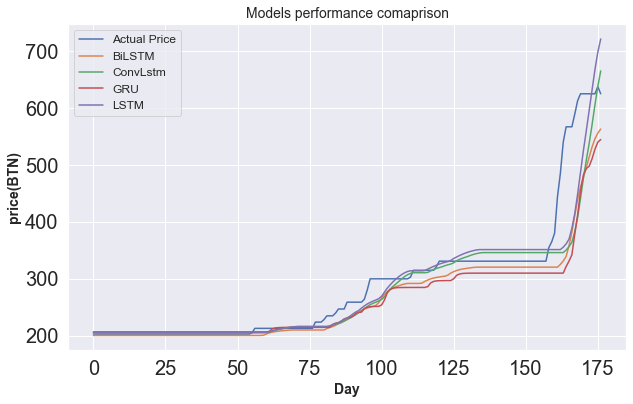

In [20]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(10, 6)

ax.plot(df_merged['actual'],label='Actual Price')
ax.plot(df_merged['bilstm'],label='BiLSTM')
ax.plot(df_merged['convLstm'],label='ConvLstm')
ax.plot(df_merged['gru'],label='GRU')
ax.plot(df_merged['lstm'],label='LSTM')

ax.set_xlabel('Day', fontsize=14, fontweight='bold')
ax.set_ylabel('price(BTN)', fontsize=14, fontweight='bold')

# Set x and y ticks
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.title('Models performance comaprison', fontsize = 14)
ax.legend(fontsize = 12)
plt.show()

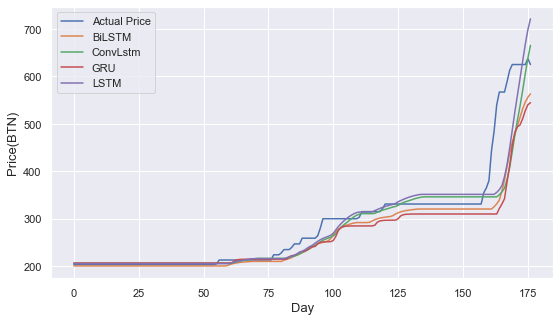

In [18]:
plt.figure(figsize=(9,5))
plt.plot(df_merged['actual'],label='Actual Price')
plt.plot(df_merged['bilstm'],label='BiLSTM')
plt.plot(df_merged['convLstm'],label='ConvLstm')
plt.plot(df_merged['gru'],label='GRU')
plt.plot(df_merged['lstm'],label='LSTM')

plt.ylabel('Price(BTN)',fontsize = 13)
plt.xlabel('Day',fontsize = 13)
plt.legend()
plt.show()

In [15]:
metrics = pd.read_csv('metrics.csv')
metrics

,Sl. No,Model,RMSE,MAE,R2
0,1,BiLSTM,21.47,12.04,0.9593
1,2,ConvLSTM,23.93,12.23,0.9495
2,3,LSTM,27.15,13.73,0.9349
3,4,GRU,30.45,17.82,0.9182


In [16]:
metrics = metrics.dropna()
metrics

,Sl. No,Model,RMSE,MAE,R2
0,1,BiLSTM,21.47,12.04,0.9593
1,2,ConvLSTM,23.93,12.23,0.9495
2,3,LSTM,27.15,13.73,0.9349
3,4,GRU,30.45,17.82,0.9182


In [17]:
metric_compare = metrics[['Model', 'RSME', 'MAE','R2']]
metric_compare

KeyError: "['RSME'] not in index"

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center')
  
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = metric_compare['Model']
    y = metric_compare['RSME']
      
    # making the bar chart on the data
    plt.figure(figsize=(8,5))
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel("RMSE")
      
    plt.rcParams.update({'font.size': 20})
    
    plt.rc('axes', titlesize = 20)
    plt.rc('axes', labelsize=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    
    # visualizing the plot
    plt.show()

In [ ]:
# plt.figure(figsize=(6,4),dpi=100)
# plt.bar(x=metric_compare['Model'], 
#         height=metric_compare['RSME'],
#         color=['red', 'blue', 'green','purple','magenta','cyan','orange'])
# plt.xticks(rotation=90)
# plt.ylabel("RSME Value",fontsize = 16)
# plt.xlabel("Models",fontsize = 16)
# plt.bar_label(metric_compare['RSME'])
# plt.show()

In [ ]:
plt.savefig("plots/rmse.png")

In [ ]:
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = metric_compare['Model']
    y = metric_compare['MAE']
      
    # making the bar chart on the data
    plt.figure(figsize=(8,5))
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel("MAE")
      
    plt.rcParams.update({'font.size': 20})
    
    # plt.rc('axes', titlesize = 20)
    # plt.rc('axes', labelsize=20)
    # plt.rc('xtick', labelsize=20)
    # plt.rc('ytick', labelsize=20)
    
    # visualizing the plot
    plt.show()

In [ ]:
# plt.figure(figsize=(6,4),dpi=100)
# plt.barh(y = metric_compare['Model'],
#          width = metric_compare['MAE'], 
#          color=['red', 'blue', 'green','purple','magenta','cyan','orange'])
# plt.xticks(rotation=0)
# plt.ylabel("Models",fontsize = 16)
# plt.xlabel("MAE Value",fontsize = 16)
# plt.show()

In [ ]:
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = metric_compare['Model']
    y = metric_compare['R2']
      
    # making the bar chart on the data
    plt.figure(figsize=(8,5))
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel("R2")
      
    plt.rcParams.update({'font.size': 20})
    
    plt.rc('axes', titlesize = 20)
    plt.rc('axes', labelsize=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    
    # visualizing the plot
    plt.show()

In [ ]:
# plt.figure(figsize=(6,4),dpi=100)
# plt.barh(y = metric_compare['Model'],
#          width = metric_compare['R2'], 
#          color=['red', 'blue', 'green','purple','magenta','cyan','orange'])
# plt.xticks(rotation=0)
# plt.ylabel("Models",fontsize = 16)
# plt.xlabel("R2 Value",fontsize = 16)
# plt.show()

In [ ]:
bilstmV = pd.read_excel("bilstmVariations.xlsx")
bilstmV